<a href="https://colab.research.google.com/github/AliveBotswana/alivebotswana-eportfolio-msc-ai/blob/main/GROUP_1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. LOADING AND INSPECTING THE DATA

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st


In [ ]:
df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "dgomonov/new-york-city-airbnb-open-data", 'AB_NYC_2019.csv')

/tmp/ipython-input-2276576450.py:1: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "dgomonov/new-york-city-airbnb-open-data", 'AB_NYC_2019.csv')


100%|██████████| 2.29M/2.29M [00:00<00:00, 107MB/s]

Extracting zip of AB_NYC_2019.csv...


In [ ]:
print("Dataset Shape:", df.shape)

Dataset Shape: (48895, 16)


In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
print("\nColumns and Data Types:\n", df.dtypes)


Columns and Data Types:
 id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [ ]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
                  id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1

In [ ]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
columns_to_drop = ['id', 'host_id', 'name', 'host_name', 'last_review']
df = df.drop(columns=columns_to_drop, axis=1)

In [ ]:
print("\nColumns and Data Types:\n", df.dtypes)


Columns and Data Types:
 neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [ ]:
print("Updated Columns:", df.columns)
print("New Shape:", df.shape)

Updated Columns: Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
New Shape: (48895, 11)


2. Handling missing data (Reviews per month: NaN, and Price: to eliminate O price)

In [ ]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [ ]:
df = df[df['price'] > 0]

In [ ]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [ ]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
print("\nSummary Statistics:\n")
df.describe()


Summary Statistics:



,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


3. DATA VISUALISATION


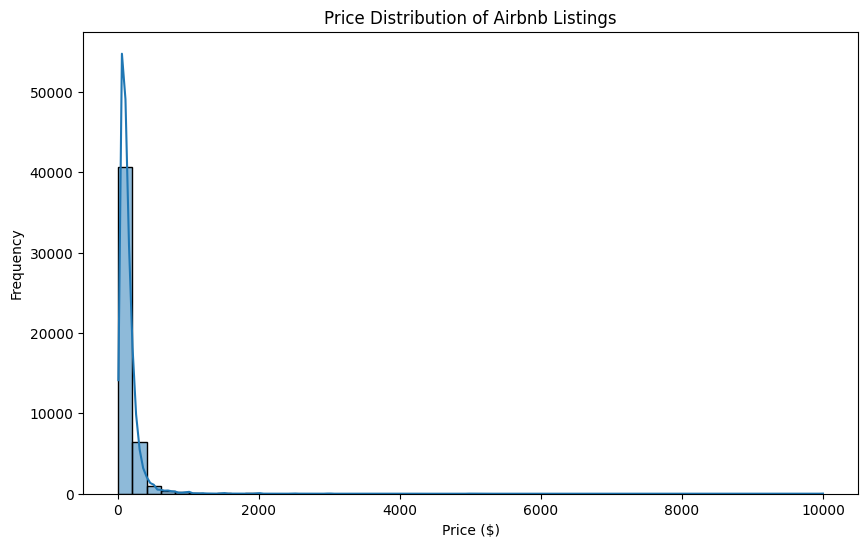

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution of Airbnb Listings')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

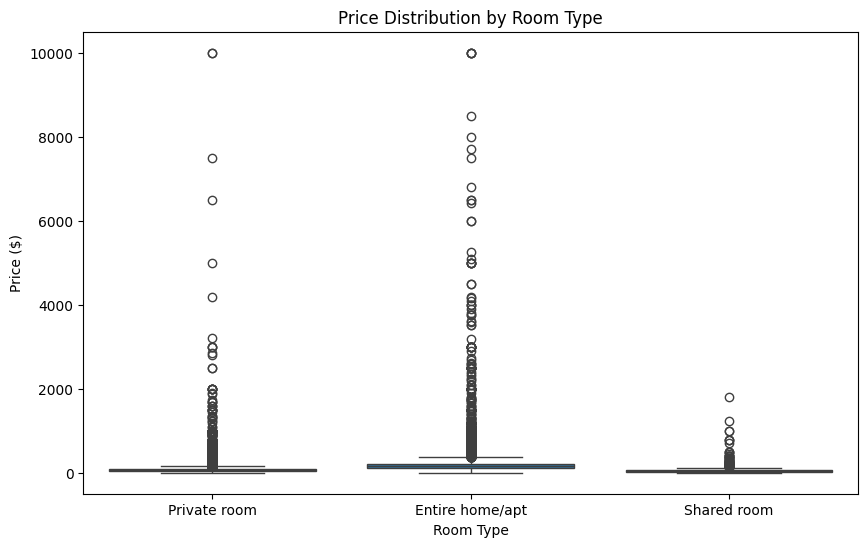

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.show()

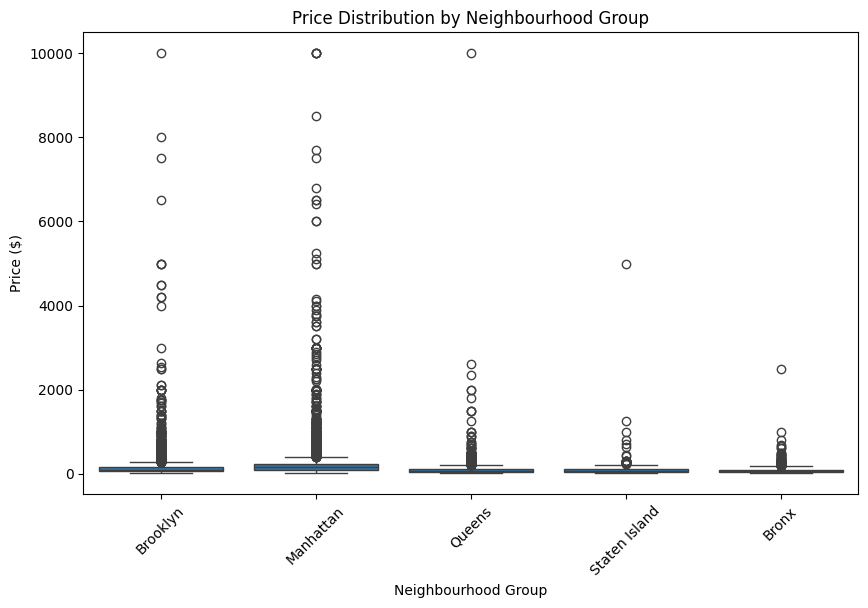

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

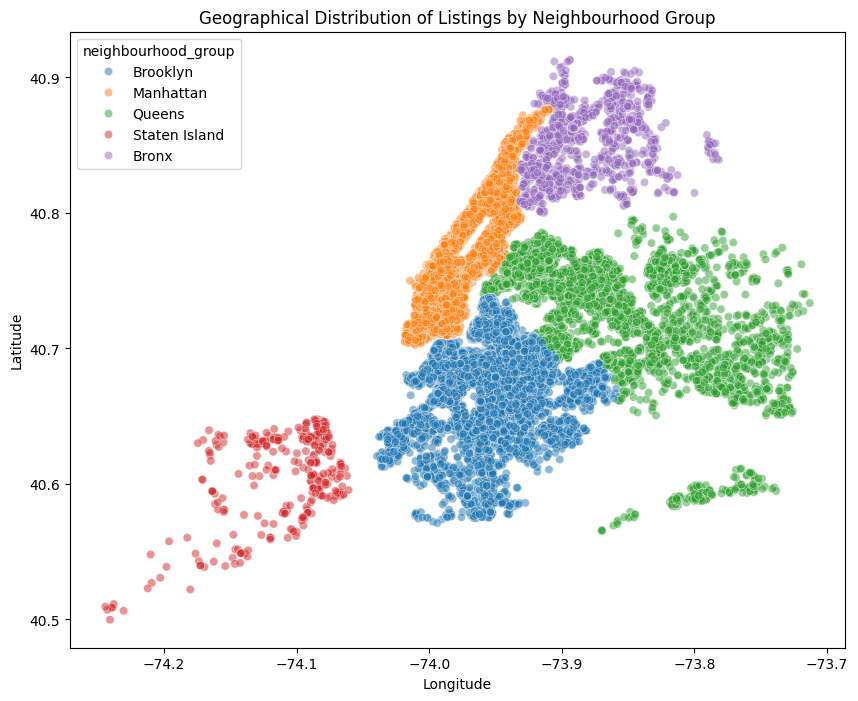

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df, alpha=0.5)
plt.title('Geographical Distribution of Listings by Neighbourhood Group')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
df['occupancy_rate'] = (365 - df['availability_365']) / 365 * 100

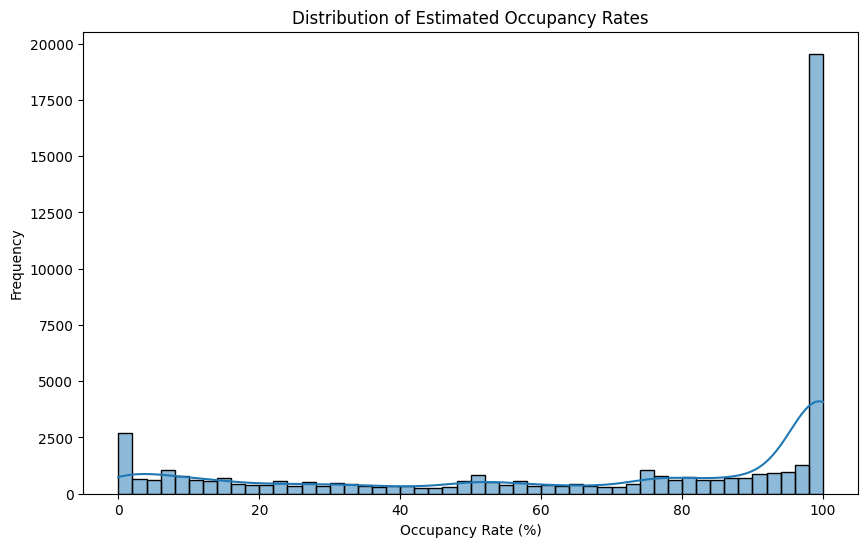

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['occupancy_rate'], bins=50, kde=True)
plt.title('Distribution of Estimated Occupancy Rates')
plt.xlabel('Occupancy Rate (%)')
plt.ylabel('Frequency')
plt.show()

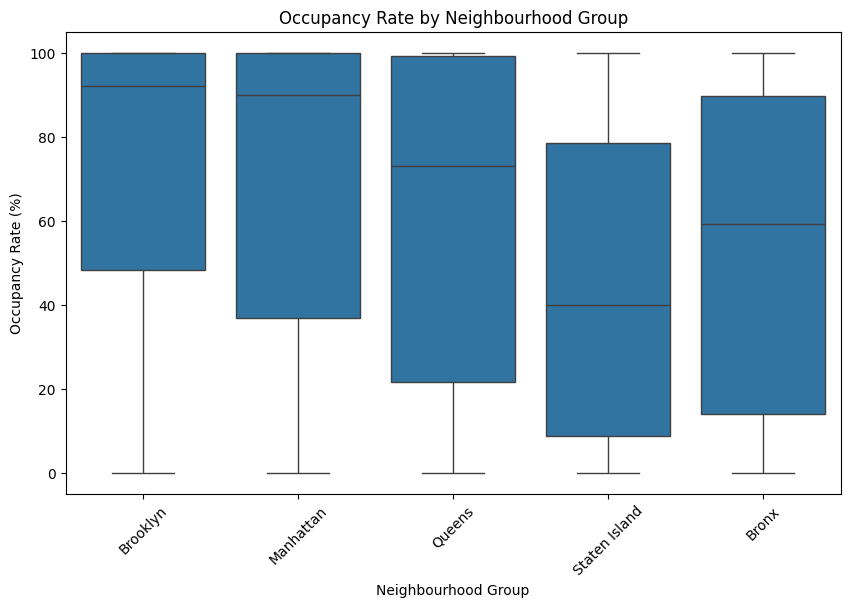

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='occupancy_rate', data=df)
plt.title('Occupancy Rate by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Occupancy Rate (%)')
plt.xticks(rotation=45)
plt.show()

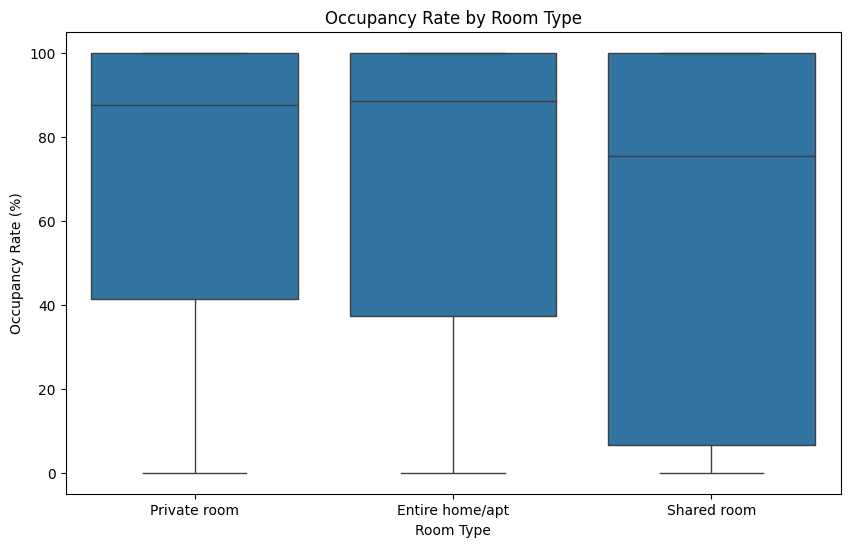

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='occupancy_rate', data=df)
plt.title('Occupancy Rate by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Occupancy Rate (%)')
plt.show()

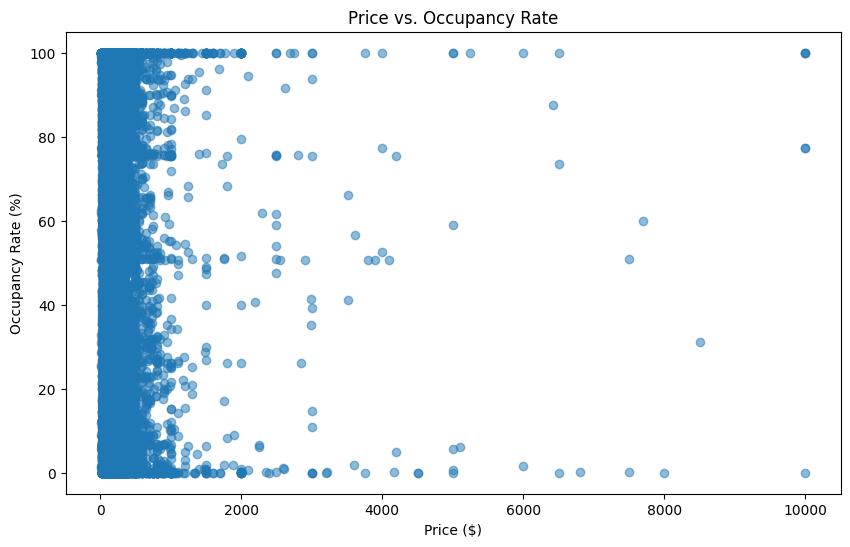

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['occupancy_rate'], alpha=0.5)
plt.title('Price vs. Occupancy Rate')
plt.xlabel('Price ($)')
plt.ylabel('Occupancy Rate (%)')
plt.show()

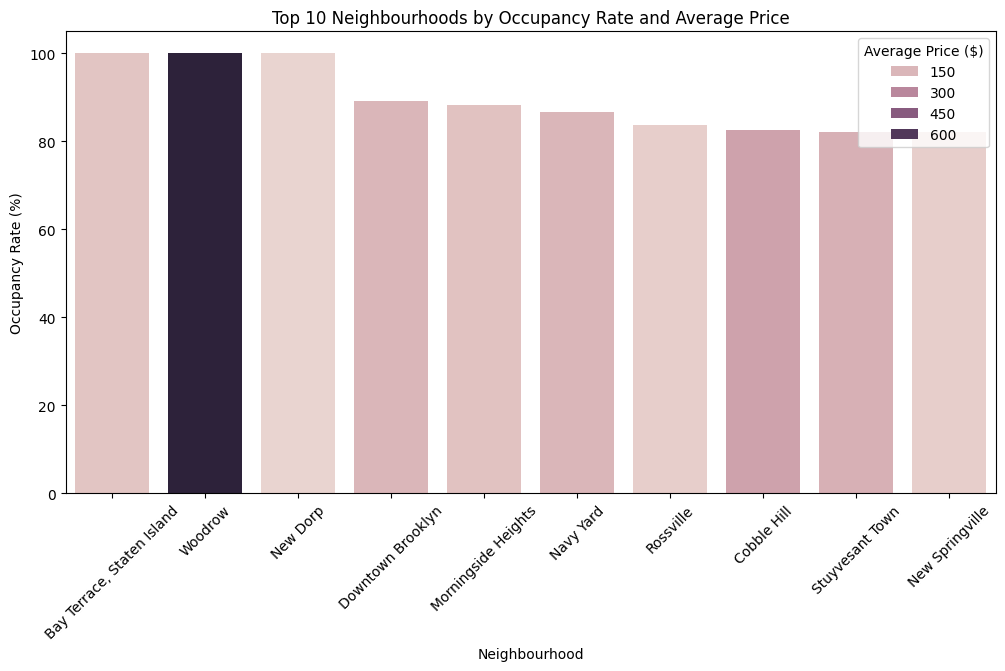

In [ ]:
neighbourhood_occupancy_price = df.groupby('neighbourhood').agg({
    'occupancy_rate': 'mean',
    'price': 'mean'
}).reset_index()

neighbourhood_occupancy_price = neighbourhood_occupancy_price.sort_values(by='occupancy_rate', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='neighbourhood', y='occupancy_rate', hue='price', data=neighbourhood_occupancy_price)
plt.title('Top 10 Neighbourhoods by Occupancy Rate and Average Price')
plt.xlabel('Neighbourhood')
plt.ylabel('Occupancy Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Average Price ($)')
plt.show()

In [ ]:
# df.to_csv('airbnb_nyc_2019_with_occupancy.csv', index=False)
# files.download('airbnb_nyc_2019_with_occupancy.csv')

PLEASE NOTE THE ADDED COLUMN BELOW ( OCCUPANCY RATE )

In [ ]:
print("\nColumns and Data Types:\n", df.dtypes)


Columns and Data Types:
 neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
occupancy_rate                    float64
dtype: object


In [ ]:
df['revenue'] = df['price'] * (365 - df['availability_365'])
# df['occupancy_rate'] = (365 - df['availability_365']) / 365 * 100

In [ ]:
grouped = df.groupby(['neighbourhood_group', 'room_type']).agg({
'revenue': 'mean',
 'occupancy_rate': 'mean',
 'price': ['mean', 'count']  # Avg price and listing count
}).reset_index()
grouped.columns = ['neighbourhood_group', 'room_type', 'avg_revenue', 'avg_occupancy', 'avg_price', 'listing_count']

In [ ]:
high_occ = grouped[grouped['avg_occupancy'] > 70].sort_values('avg_revenue', ascending=False)

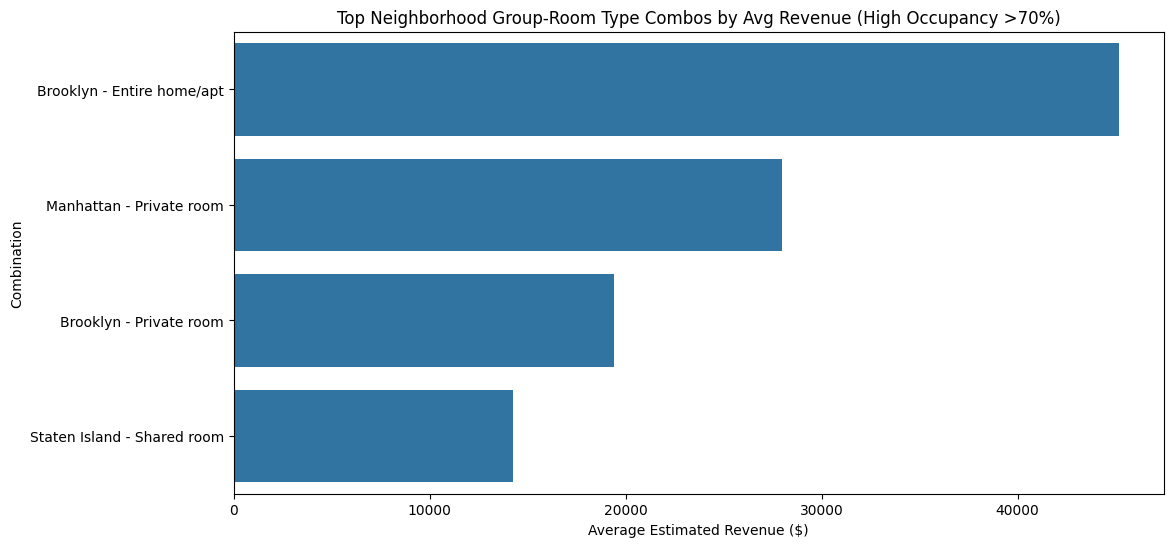

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='avg_revenue', y=high_occ['neighbourhood_group'] + ' - ' + high_occ['room_type'], data=high_occ)
plt.title('Top Neighborhood Group-Room Type Combos by Avg Revenue (High Occupancy >70%)')
plt.xlabel('Average Estimated Revenue ($)')
plt.ylabel('Combination')
plt.show()